#### 간단한 모델링

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split

# 사용자정의 함수: key를 입력하면 해당 데이터를 데이터프레임으로 읽어옴
from aiddd.data_manager import read_data, write_data
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred

plt_settings()

In [2]:
df_data = read_data('병합 전체카운트')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   공사번호     5810 non-null   int64 
 1   최초등록자사번  5810 non-null   object
 2   최종변경자사번  5810 non-null   object
 3   총공사비     5810 non-null   int64 
 4   최초등록일시   5810 non-null   object
 5   최종변경일시   5810 non-null   object
 6   공사형태코드   5810 non-null   int64 
 7   공사형태명    5810 non-null   object
 8   계약전력     5810 non-null   int64 
 9   기별:애자    5810 non-null   int64 
 10  기별:인입선   5810 non-null   int64 
 11  기별:장주    5810 non-null   int64 
 12  기별:전선    5810 non-null   int64 
 13  기별:전주    5810 non-null   int64 
 14  기별:접지    5810 non-null   int64 
 15  기별:지지선   5810 non-null   int64 
 16  설계:고객    5810 non-null   int64 
 17  설계:애자    5810 non-null   int64 
 18  설계:인입선   5810 non-null   int64 
 19  설계:장주    5810 non-null   int64 
 20  설계:전선    5810 non-null   int64 
 21  설계:전주    5810 non-null   int64 
 22  

In [4]:
# 기별 및 설계에서 전주 갯 수가 15개 미만인 대상 추출
df_data_bd15 = df_data[df_data['기별:전주']<15].copy()
df_data_ds15 = df_data[df_data['설계:전주']<15].copy()

In [5]:
object_cols = ['최초등록자사번', '최종변경자사번', '최초등록일시', '최종변경일시', '공사형태명']
df_data_bd15.drop(columns=object_cols, axis=1, inplace=True)
df_data_ds15.drop(columns=object_cols, axis=1, inplace=True)

In [6]:
not_bd_cols = [col for col in df_data_bd15 if '설계:' in col]
not_ds_cols = [col for col in df_data_ds15 if '기별:' in col]

In [7]:
_ = [df_data_bd15.pop(col) for col in not_bd_cols]
_ = [df_data_ds15.pop(col) for col in not_ds_cols]

In [8]:
df_label_bd15 = df_data_bd15.pop('총공사비')
df_label_ds15 = df_data_ds15.pop('총공사비')

In [9]:
feature_cols_name_bd = df_data_bd15.columns

In [10]:
X_bd15_train, X_bd15_test, y_bd15_train, y_bd15_test = \
    train_test_split(df_data_bd15, df_label_bd15, test_size=0.2)
X_ds15_train, X_ds15_test, y_ds15_train, y_ds15_test = \
    train_test_split(df_data_ds15, df_label_ds15, test_size=0.2)

In [11]:
model_dtr_bd = DecisionTreeRegressor()
model_dtr_bd.fit(X_bd15_train, y_bd15_train)
pred_dtr_bd = model_dtr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_dtr_bd)

R2_SCORE: 0.219370, MAPE2: 43.454088, MSE: 44765004371247.437500, RMSE: 6690665.465501, MAPE: 2.060708, MAE: 2855434.453520


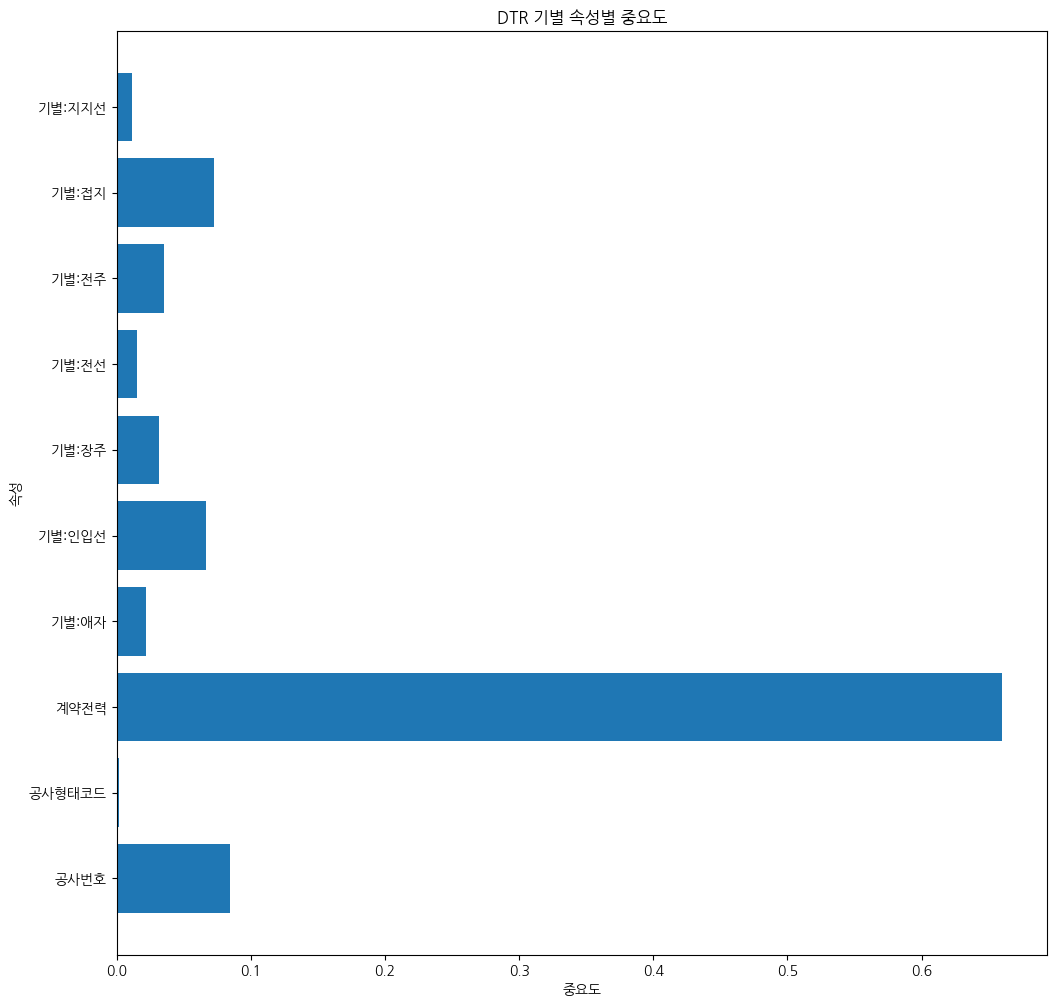

In [12]:
f_importances(model_dtr_bd, feature_cols_name_bd, 'DTR 기별')

In [13]:
model_dtr_ds = DecisionTreeRegressor()
model_dtr_ds.fit(X_ds15_train, y_ds15_train)
pred_dtr_ds = model_dtr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_dtr_ds)

R2_SCORE: 0.362993, MAPE2: 38.584375, MSE: 44734993677121.757812, RMSE: 6688422.360850, MAPE: 1.044663, MAE: 2646373.296822


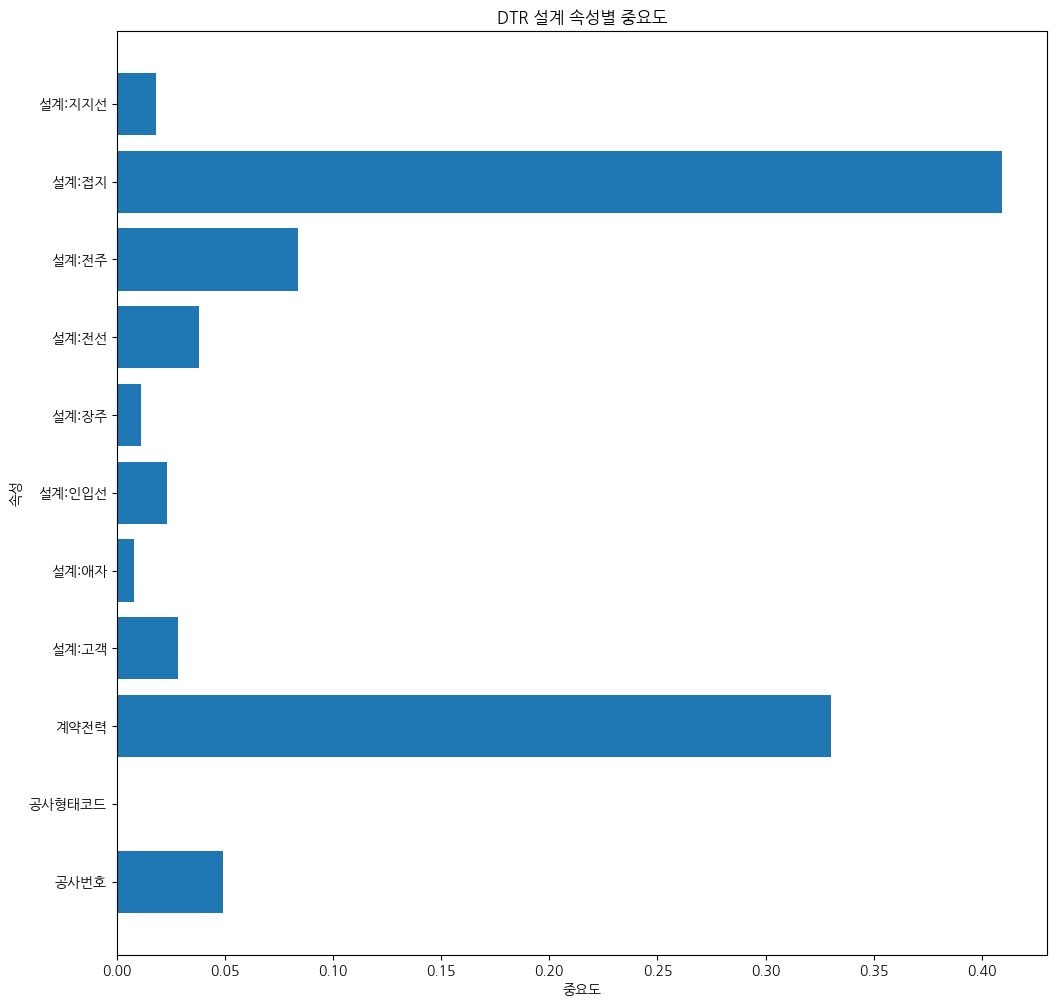

In [14]:
feature_cols_name_ds = df_data_ds15.columns
f_importances(model_dtr_ds, feature_cols_name_ds, 'DTR 설계')

In [15]:
SEED = 123

In [16]:
model_rfr_bd = RandomForestRegressor(
    n_estimators=500, n_jobs=-1, random_state=SEED
)
model_rfr_bd.fit(X_bd15_train, y_bd15_train)
pred_rfr_bd = model_rfr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_dtr_bd)

R2_SCORE: 0.219370, MAPE2: 43.454088, MSE: 44765004371247.437500, RMSE: 6690665.465501, MAPE: 2.060708, MAE: 2855434.453520


In [27]:
model_rfr_ds = RandomForestRegressor(
    n_estimators=500, n_jobs=-1, random_state=SEED
)
model_rfr_ds.fit(X_ds15_train, y_ds15_train)
pred_rfr_ds = model_rfr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_rfr_ds)

R2_SCORE: 0.591363, MAPE2: 36.438855, MSE: 28697269584214.011719, RMSE: 5356983.254054, MAPE: 1.007928, MAE: 2193309.896959


In [18]:
model_gbr_bd = GradientBoostingRegressor()
model_gbr_bd.fit(X_bd15_train, y_bd15_train)
pred_gbr_bd = model_gbr_bd.predict(X_bd15_test)
_ = regression_evaluation(y_bd15_test, pred_gbr_bd)

R2_SCORE: 0.351065, MAPE2: 51.295719, MSE: 37213033925836.515625, RMSE: 6100248.677377, MAPE: 2.463140, MAE: 2646967.674204


In [19]:
model_gbr_ds = GradientBoostingRegressor()
model_gbr_ds.fit(X_ds15_train, y_ds15_train)
pred_gbr_ds = model_gbr_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_gbr_ds)

R2_SCORE: 0.604611, MAPE2: 46.834278, MSE: 27766905534318.496094, RMSE: 5269431.234424, MAPE: 1.699547, MAE: 2418886.266312


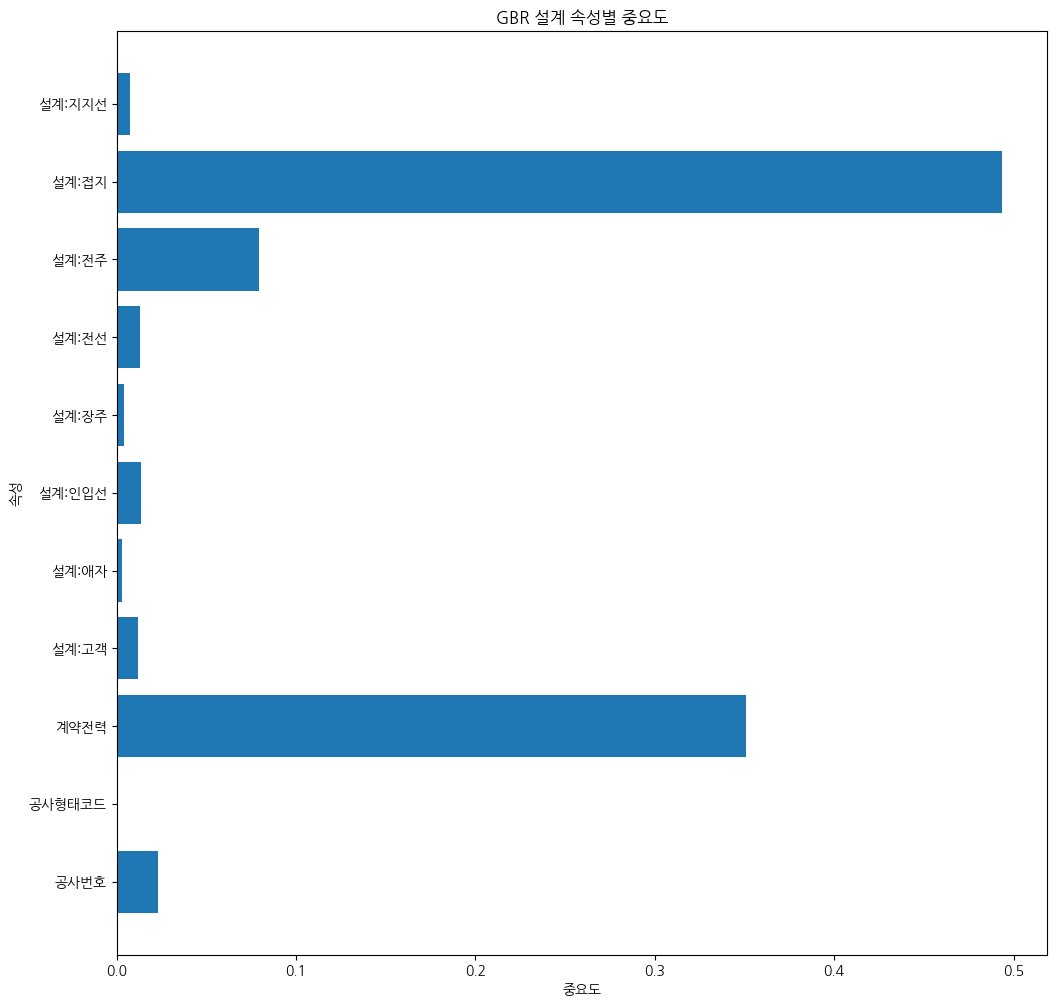

In [20]:
f_importances(model_gbr_ds, feature_cols_name_ds, 'GBR 설계')

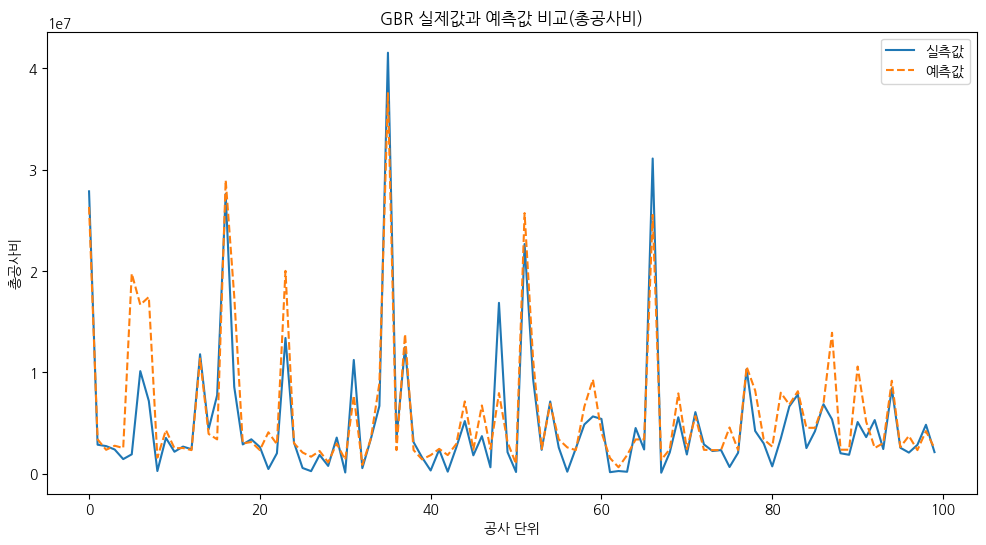

In [22]:
plot_actual_pred(y_ds15_test[500:600], pred_gbr_ds[500:600], 'GBR 실제값과 예측값 비교(총공사비)')

In [24]:
y_ds15_test.min(), y_ds15_test.max()

(11400, 115505909)

In [25]:
model_en_ds = ElasticNet(
    alpha=0.1,          # 규제강도(0~inf), 
                        # 값이 클수록 규제가 강화되고 모델이 단순화됨
    l1_ratio=0.5,       # L1/L2 규제 균형조절, 0(L2만), 1(L1만) 사용
    random_state=SEED
).fit(X_ds15_train, y_ds15_train)
pred_en_ds = model_en_ds.predict(X_ds15_test)
_ = regression_evaluation(y_ds15_test, pred_en_ds)

R2_SCORE: 0.415728, MAPE2: 67.900009, MSE: 41031621041610.250000, RMSE: 6405592.950041, MAPE: 1.853636, MAE: 3345091.894292


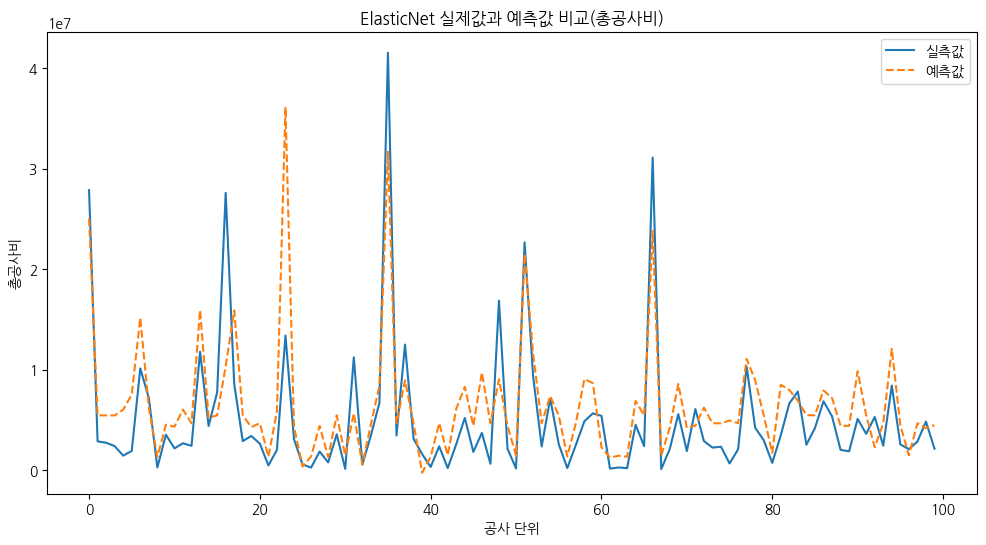

In [26]:
plot_actual_pred(y_ds15_test[500:600], pred_en_ds[500:600], 'ElasticNet 실제값과 예측값 비교(총공사비)')

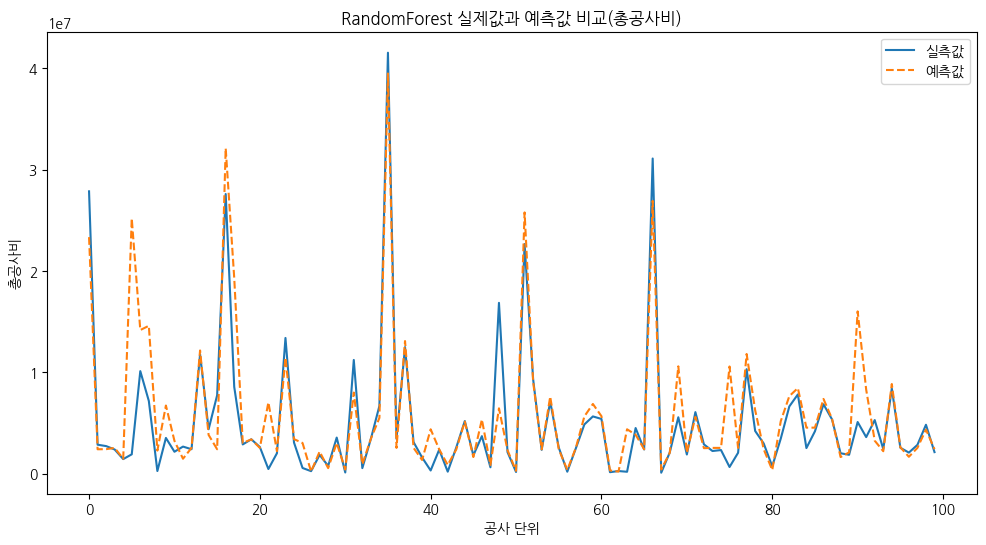

In [28]:
plot_actual_pred(y_ds15_test[500:600], pred_rfr_ds[500:600], 'RandomForest 실제값과 예측값 비교(총공사비)')